In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time


import seaborn as sns
sns.set_style("whitegrid")

from scipy.spatial.distance import jensenshannon

import urllib3
import json

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Update data from nomis

In [2]:
df = pd.read_csv('../../data/testing/nomis/ethnicity.csv', index_col=0)

In [3]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [4]:
dct = {}

for b in boroughs:
    dct[b] = df[b].values

In [5]:
df = pd.DataFrame(dct, index=df.index)

In [6]:
df.to_csv('../../data/testing_select/nomis/ethnicity.csv')

# Compute values for synthetic data

In [7]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']
idx = ['Total', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [8]:
# ciDATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/ciDATGAN_select/{}.csv'.format(b))

    vals = [len(df)]
    for i in idx[1:]:
        vals.append(len(df[df['ethnicity'] == i]))

    dct[b] = vals

In [9]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/ciDATGAN/ethnicity.csv')

In [10]:
# DATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/DATGAN_select/{}.csv'.format(b))

    vals = [len(df)]
    for i in idx[1:]:
        vals.append(len(df[df['ethnicity'] == i]))

    dct[b] = vals

In [11]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/DATGAN/ethnicity.csv')

In [12]:
# oversample
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/oversample/{}.csv'.format(b))

    vals = [len(df)]
    for i in idx[1:]:
        vals.append(len(df[df['ethnicity'] == i]))

    dct[b] = vals

In [13]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/oversample/ethnicity.csv')

# Compare

In [25]:
orig = pd.read_csv('../../data/testing_select/nomis/ethnicity.csv', index_col=0)

In [26]:
files = [
    '../../data/testing_select/DATGAN/ethnicity.csv',
    '../../data/testing_select/ciDATGAN/ethnicity.csv',
    '../../data/testing_select/oversample/ethnicity.csv'
]

dfs = [pd.read_csv(f, index_col=0) for f in files]
labels = ['DATGAN', 'ciDATGAN', 'Oversample LTDS']

In [27]:
orig = orig/orig.iloc[0]
orig = orig.iloc[1:-1]

errors = {}

for (df, l) in zip(dfs, labels):
    df = df/df.iloc[0]
    df = df.iloc[1:-1]

    errors[l] = []

    for c in orig.columns:
        errors[l].append(jensenshannon(df[c], orig[c]))

In [28]:
for l in labels:
    print('{}: {:.2e} \pm {:.2e}'.format(l, np.mean(errors[l]), np.std(errors[l])))

DATGAN: 1.15e-01 \pm 5.16e-02
ciDATGAN: 1.14e-01 \pm 5.23e-02
Oversample LTDS: 6.05e-02 \pm 2.50e-02


<AxesSubplot:>

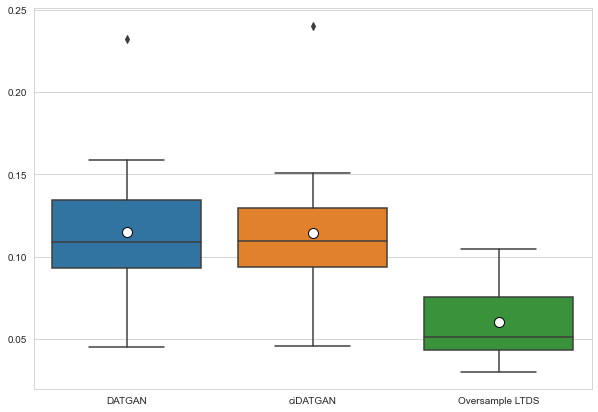

In [29]:
df = pd.DataFrame(errors)

plt.figure(figsize=(10,7))

sns.boxplot(data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [30]:
df

,DATGAN,ciDATGAN,Oversample LTDS
0,0.112880,0.108776,0.104417
1,0.045297,0.045817,0.055318
2,0.108332,0.098725,0.101964
3,0.141965,0.134755,0.041331
4,0.109218,0.114346,0.048638
5,0.159013,0.150743,0.049502
6,0.048073,0.049211,0.030191
7,0.103970,0.110084,0.053022
8,0.089427,0.091672,0.082020
9,0.232216,0.240477,0.038401
